# Mid-test: Python Use-Case (Water Case)



##### Zumarsiyah Mahsyari
##### Astra Data Scientist Bootcamp

**Dataset** : <br> Annual Water Usage in Baltimore. 

You can download it here
https://drive.google.com/open?id=1axM3gfGxQq4T0wuwP51DVMQAecVFmpxL

The dataset is credited to Hipel an Mcleod, 1994.

**Background** : The Dataset provides the annual water usage in Baltimore from 1885 to 1963, or 79 years of data.
The values are in the units of liters per capita per day, and there are 79 observations.

**Objective** : The Problem is to predict annual water usage. <br>

**Instructions** :

1. Load the dataset as a Pandas Series and split into two, one for model development (dataset.csv) and the other for validation (validation.csv).
2. Create summary of the dataset, with python function.
3. Create A line plot of a time series dataset, it will provide a lot of insight into the problem.
4. Group the annual data by decade and get an idea of the spread of observations for each decade and how this may be changing.
5. Create models using ARIMA <br>
a. Split the dataset into train and test sets directly<br>
b. The first 50% of the dataset will be held back to train the model.<br>
c. The remaining 50% of the dataset will be iterated and test the model.<br>
d. The ARIMA(p,d,q) model requires three parameters and is traditionally configured manually.<br>
e. Use an ARIMA(0,1,0) on the raw data may be a good starting point.<br>
f. When model trained, a one-step prediction made ang the prediction stored for later evaluation.<br>
g. The actual observation from the test dataset woll be added to the training dataset for the next iteration.<br>
h. The predictions made during the enumeration of the test dataset will be evaluated and an RMSE score reported.<br>
6. Calculate the RMSE using the helper function from the scikit-learn library, from dataset only<br>
Those RMSE will show you on average, how much the error/the model was wrong/gap between predection and expected value per capita per day for each prediction made.

### Load the dataset as a Pandas Series and split into two, one for model development(dataset.csv) and the other for validation (validation.csv)

In [151]:
import scipy
import numpy
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

The code below will load the dataset as a Pandas Series and split into two, one for model development (dataset.csv) and the other for validation (validation.csv). <br>

In [152]:
series = pd.read_csv('C:/Users/zumars064124/Documents/ADSB 2/Midtest/water.csv')
split_point = len(series) - 10
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', index=False)
validation.to_csv('validation.csv', index=False)

Dataset 69, Validation 10


The specific contents of these files are:
- dataset.csv: Observations from 1885 to 1953 (69 observations).
- validation.csv: Observations from 1954 to 1963 (10 observations). <br>

The validation dataset is about 12% of the original dataset.

In [153]:
dataset.head()

,Year,"Baltmore city annual water use, liters per capita per day, 1885-1968"
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413


In [154]:
validation.head()

,Year,"Baltmore city annual water use, liters per capita per day, 1885-1968"
69,1954,568
70,1955,575
71,1956,579
72,1957,587
73,1958,602


 ### Create summary of the dataset, with python function

Summary statistics provide a quick look at the limits of observed values. It can help to get a quick idea of what we are working with.

In [155]:
dataset.describe()

,Year,"Baltmore city annual water use, liters per capita per day, 1885-1968"
count,69.000000,69.000000
mean,1919.000000,500.478261
std,20.062403,73.901685
min,1885.000000,344.000000
25%,1902.000000,458.000000
50%,1919.000000,492.000000
75%,1936.000000,538.000000
max,1953.000000,662.000000


Some observations from these statistics include:

- The number of observations (count) matches our expectation, meaning we are handling the data correctly.
- The mean is about 500, which we might consider our level in this series.
- The standard deviation and percentiles suggest a reasonably tight spread around the mean.

### Create a line plot of a time series dataset, it will provide a lot of insight into the problem

A line plot of a time series dataset can provide a lot of insight into the problem

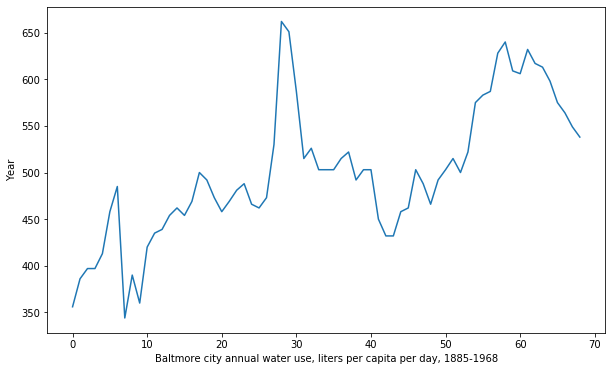

In [157]:
water = dataset['Baltmore city annual water use, liters per capita per day, 1885-1968']
plt.xlabel("Baltmore city annual water use, liters per capita per day, 1885-1968")
plt.ylabel('Year')
plt.plot(water)

Some observations from the plot include:

- There looks to be an increasing trend in water usage over time.
- There do not appear to be any obvious outliers, although there are some large fluctuations.
- There is a downward trend for the last few years of the series.

###  Group the annual data by decade and get an idea of the spread of observations for each decade and how this may be changing.

We can group the annual data by decade and get an idea of the spread of observations for each decade and how this may be changing. <br>
The last decade only contains 9 years and may not be a useful comparison with the other decades. Therefore only data between 1885 and 1944 was plotted.

In [158]:
grup = dataset.iloc[:60,]
grup.head()

,Year,"Baltmore city annual water use, liters per capita per day, 1885-1968"
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413


The example below groups the observations by decade and creates one box and whisker plot for each decade of observations. We do expect to see some trend (increasing mean).

The example below groups the observations by decade and creates a line plot for each decade of observations.

Text(0.5, 1.0, 'Annual data by decade')

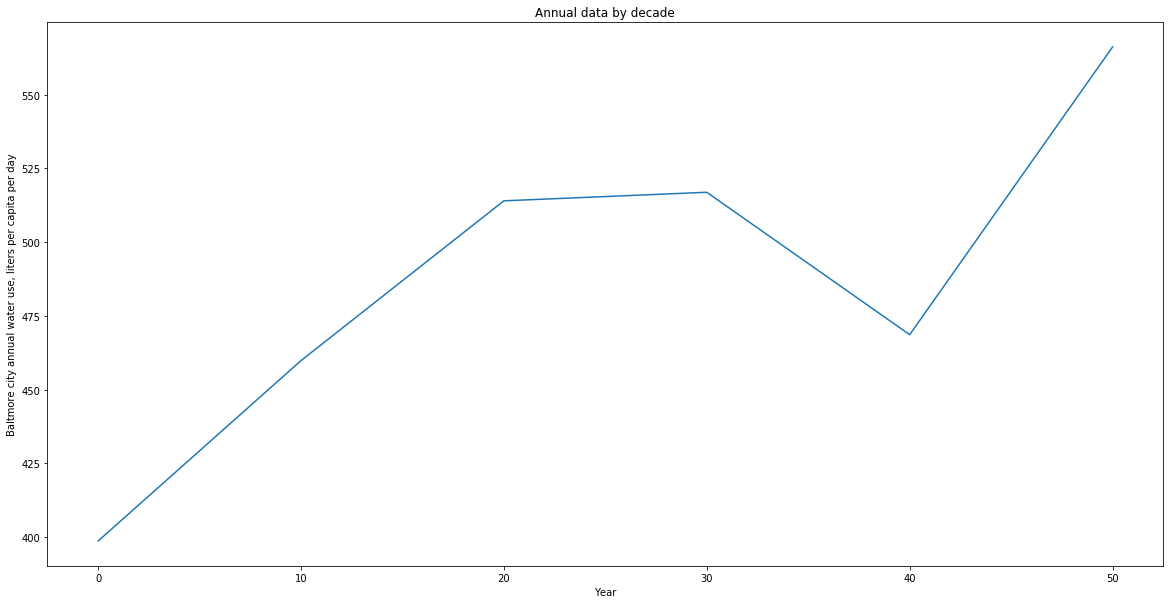

In [170]:
#groups the observations by decade
grup_decade = grup.groupby((grup.index//10)*10).mean()

#the line plot
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.set_xlabel("Year")
ax.set_ylabel('Baltmore city annual water use, liters per capita per day')
plt.plot(grup_decade)
plt.title('Annual data by decade')

The mean values for each decades (blue line) may show an increasing trend that may not be linear

### Create models using ARIMA

In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 2 columns):
Year                                                                    69 non-null int64
Baltmore city annual water use, liters per capita per day, 1885-1968    69 non-null int64
dtypes: int64(2)
memory usage: 1.2 KB


In [77]:
water = water.astype(float)

predicted=507.454545, expected=503.000000
predicted=507.323529, expected=503.000000
predicted=507.200000, expected=515.000000
predicted=519.416667, expected=522.000000
predicted=526.486486, expected=492.000000
predicted=495.578947, expected=503.000000
predicted=506.769231, expected=503.000000
predicted=506.675000, expected=450.000000
predicted=452.292683, expected=432.000000
predicted=433.809524, expected=432.000000
predicted=433.767442, expected=458.000000
predicted=460.318182, expected=462.000000
predicted=464.355556, expected=503.000000
predicted=506.195652, expected=488.000000
predicted=490.808511, expected=466.000000
predicted=468.291667, expected=492.000000
predicted=494.775510, expected=503.000000
predicted=505.940000, expected=515.000000
predicted=518.117647, expected=500.000000
predicted=502.769231, expected=522.000000
predicted=525.132075, expected=575.000000
predicted=579.055556, expected=583.000000
predicted=587.127273, expected=587.000000
predicted=591.125000, expected=628

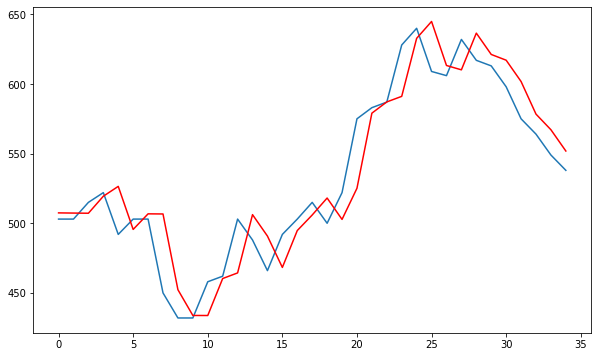

In [80]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
X = water.values
size = int(len(X) * 0.50)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

### Calculate the RMSE using the helper function from the scikit-learn library, from dataset only

In [82]:
error = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

RMSE: 15.555
